In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.drop(columns=["Unnamed: 0"], inplace=True)


In [5]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Basic check

In [7]:
data.head() # it is going to give you first 5 rows

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.tail() # it is going to give you last 5 rows

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


data.describe()`

###  it is giving you statistical informations about your data

* The distribution of TV advertisment have more spread as compared to others.
* In once case the company has spend 0 dollars for advertising on Radio.
* The cost of advertisment on radio is less while for TV is high.

In [12]:
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### it is use to get informations about data
### No missing values in the data.

In [14]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Exploratory Data Analysis

# Step 1 Univariate Analysis

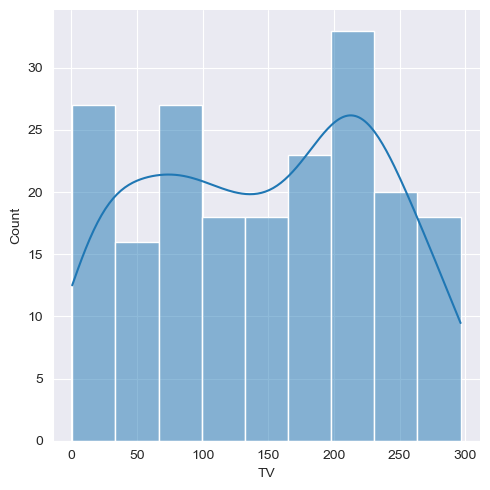

<Figure size 1000x1500 with 0 Axes>

In [17]:
sns.displot(x ="TV",data = data,kde = True)
plt.figure(figsize=(10,15))
plt.show()

* If the data is widely spread, ad spending on TV varies significantly.
* If it’s tightly packed, spending is consistent across different observations.

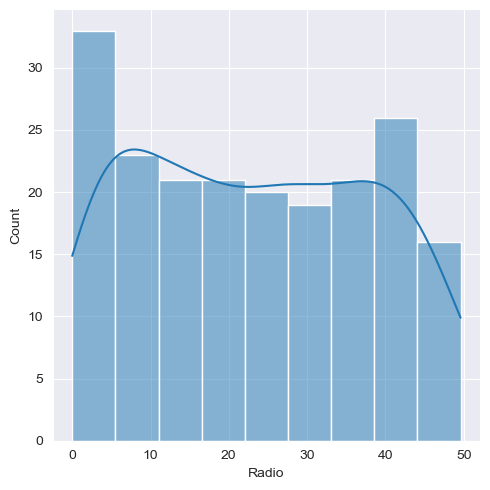

<Figure size 1000x1500 with 0 Axes>

In [19]:
sns.displot(x ="Radio",data = data,kde = True)
plt.figure(figsize=(10,15))
plt.show()

* The peak of the histogram shows the most frequent "Radio" ad spending values.
* If the peak is on the left, most companies spend low amounts on radio ads.

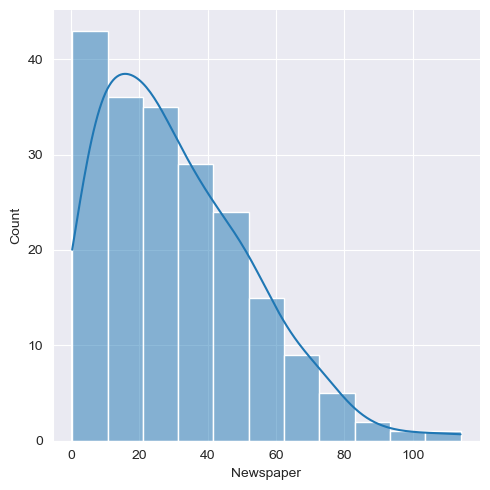

<Figure size 1000x1500 with 0 Axes>

In [21]:
sns.displot(x ="Newspaper",data = data,kde = True)
plt.figure(figsize=(10,15))
plt.show()


* Wide spread? → Companies have large variations in spending.
* Narrow spread? → Most companies have similar ad budgets for newspapers.

* If the "Newspaper" ad spending is right-skewed, it suggests most businesses invest little, but a few invest heavily.
* If it's bimodal, there may be distinct spending groups.
* If the distribution is wide, spending varies significantly across businesse

### # Step 2 Bivariate Analysis

* This step is performed when inputs and output are known.
* 1st variable will be Inputs
* 2nd variable will be output/target variable.

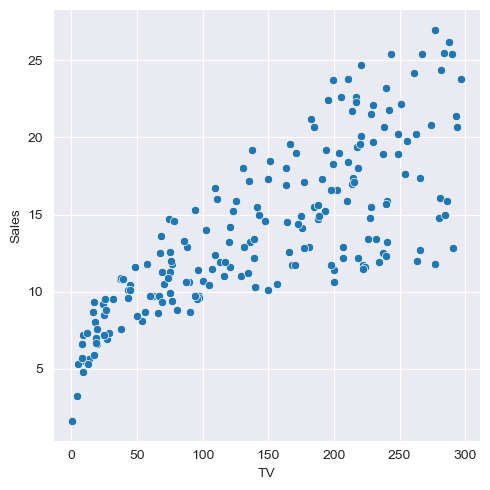

In [26]:
sns.relplot(x = "TV",y = "Sales",data = data)
plt.show()
# The more marketing on TV is leading to more sales in the product

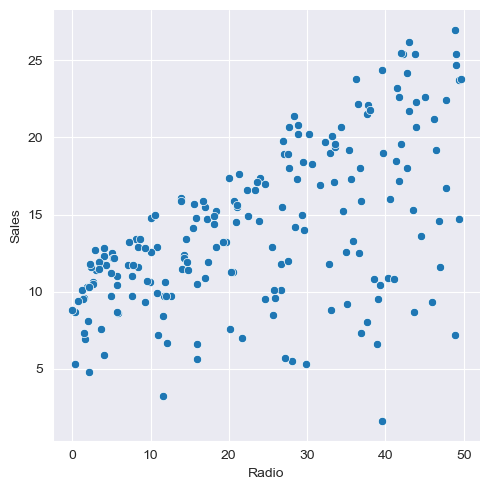

In [27]:
sns.relplot(x = "Radio",y = "Sales",data = data)
plt.show()
# Radio advertisments are not showing much trend for the sales of product.

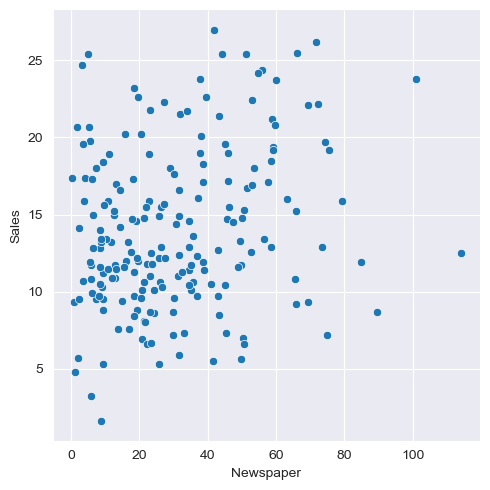

In [28]:
sns.relplot(x = "Newspaper",y = "Sales",data = data)
plt.show()
# Newspaper advertisments are not showing much trend for the sales of product.

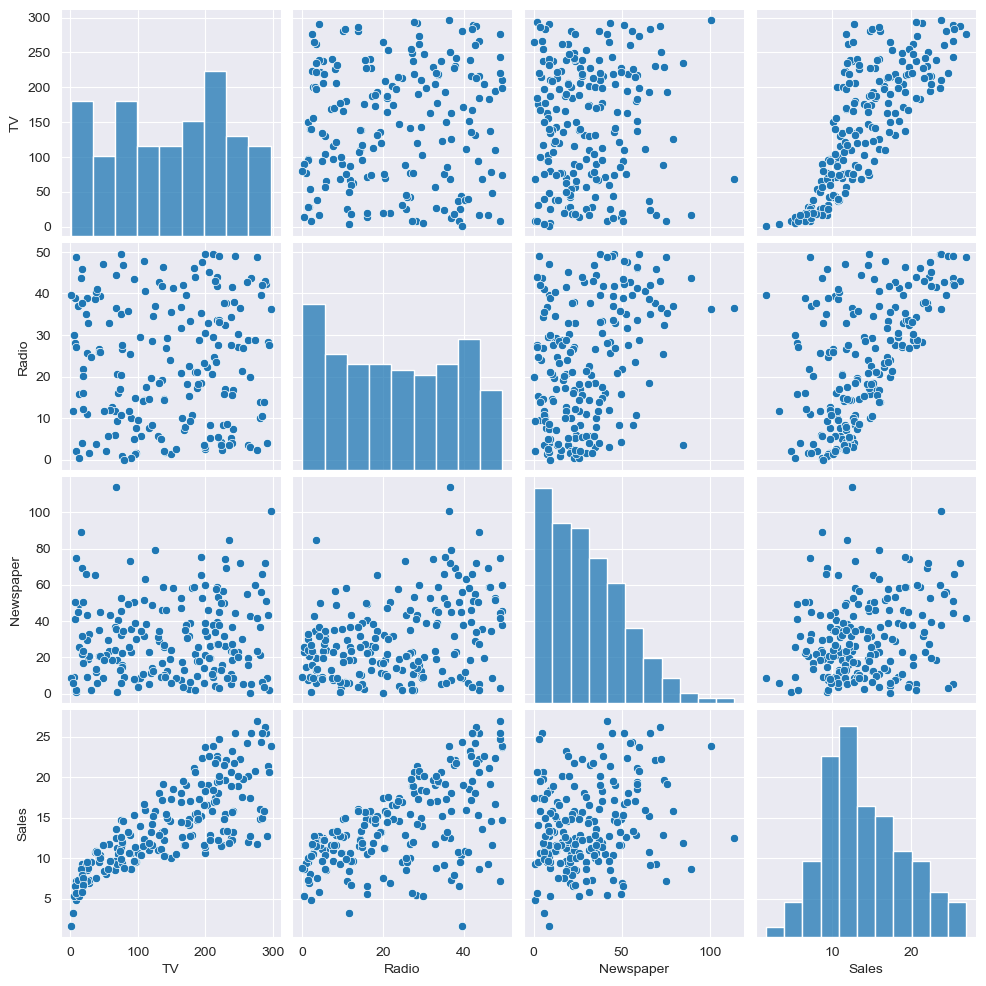

In [29]:
sns.pairplot(data) # They are multivariant graph,where we can anaylizing all the use full chart.

In [30]:
data.isnull().sum()# IN THIS DATA,THERE IS NO NULL VALUES.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: xlabel='TV'>

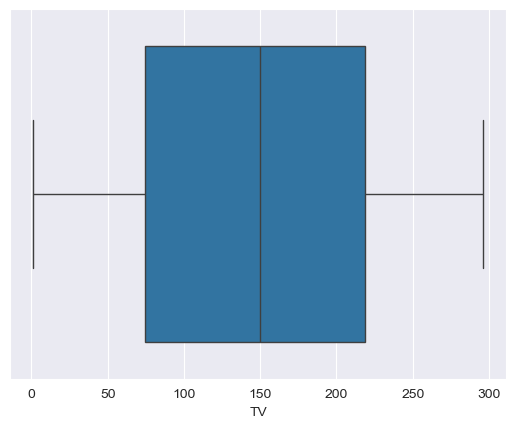

In [31]:
sns.boxplot(x = data.TV)

<Axes: xlabel='Newspaper'>

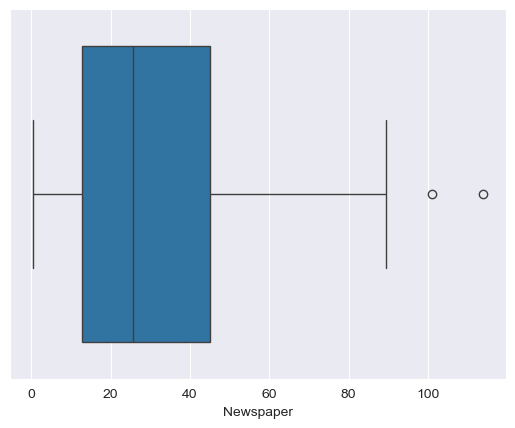

In [32]:
sns.boxplot(x = data.Newspaper)

In [33]:
q1 = data.Newspaper.quantile(0.25)
q3 = data.Newspaper.quantile(0.75)
iqr = q3 - q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr# it s iqr method for handling the outliers in data.


In [34]:
data.loc[data["Newspaper"]<lower_limit,"Newspaper"]

Series([], Name: Newspaper, dtype: float64)

In [35]:
data.loc[data["Newspaper"]>upper_limit,"Newspaper"] = data.Newspaper.median()

In [36]:
data.Newspaper.median()

25.675

<Axes: xlabel='Newspaper'>

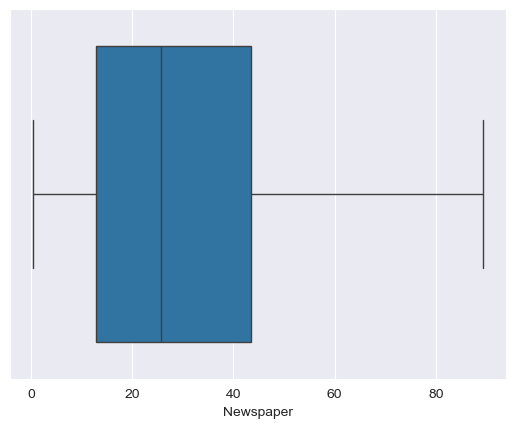

In [37]:
sns.boxplot(x = data.Newspaper)

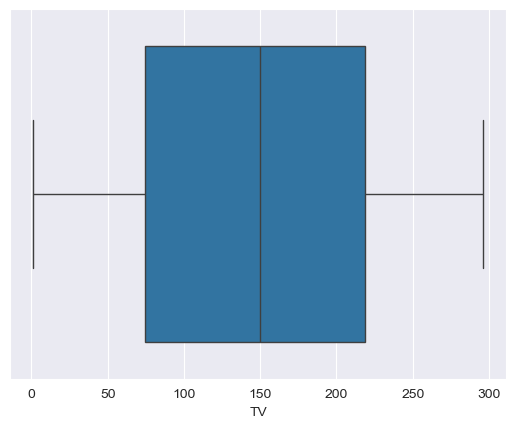

In [38]:
sns.boxplot(x = data.TV)
plt.show()

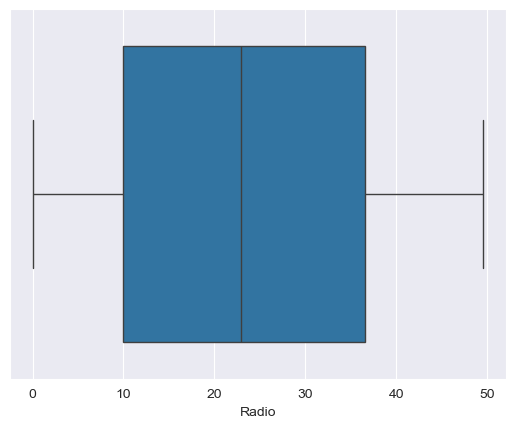

In [39]:
sns.boxplot(x = data.Radio)
plt.show()


<Axes: >

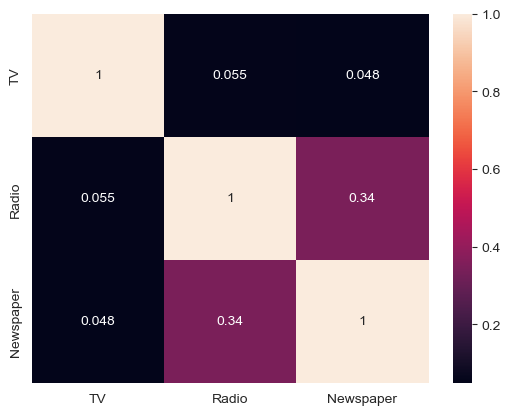

In [40]:
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

* In this graph,Sales is excluded from this matrix, you would not see its direct correlation to other variables.


# Model creation

In [43]:
#Step 1 Independent and dependent variable creation
x  = data[["TV","Radio","Newspaper"]]## X variable contains all inputs
y = data["Sales"] ## y is output

In [44]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [45]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

* In this data,we use Linear Regression model because target is continuous value.

# Linear Regression
- ML Algorithm based on supervised learning that is commonly used for predictive analysis.
- Used to determine the linear relationship between the dependent variable (y) and independent variable (x). This linear relationship is represented by a straight line called regression line / best-fit line. This line is the pattern on which the machine has learned from the data.
- Used for predicting the output of quantitative type (continuous value) eg. Age, salary, price etc.

##### Simple Linear Regression: 
- one X variable and one Y variable 
- Formula: **y = mx + c** 
        y is the response or target variable   
        x is the predictor variable
        m is the coefficient of x
        c is the intercept

# Model selection =======

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=33)

In [51]:
x_train

,TV,Radio,Newspaper
82,75.3,20.3,32.50
101,296.4,36.3,25.75
47,239.9,41.5,18.50
27,240.1,16.7,22.90
44,25.1,25.7,43.30
...,...,...,...
57,136.2,19.2,16.60
146,240.1,7.3,8.70
66,31.5,24.6,2.20
135,48.3,47.0,8.50


In [52]:
y_test

15     22.4
171    14.5
103    14.7
119     6.6
116    12.2
162    14.9
54     20.2
17     24.4
117     9.4
100    11.7
109    19.8
8       4.8
118    15.9
38     10.1
29     10.5
149    10.1
81     12.3
126     6.6
189     6.7
85     15.2
197    12.8
152    16.6
50     11.4
62     15.7
92     19.4
34      9.5
153    19.0
14     19.0
91      7.3
173    11.7
199    13.4
177    11.7
141    19.2
125    10.6
89     16.7
75      8.7
71     12.4
195     7.6
182     8.7
112    14.1
Name: Sales, dtype: float64

In [53]:
len(x_test)

40

# Model selection( Linear Regression)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
LR = LinearRegression()

In [57]:
LR.fit(x_train,y_train)# training of linear regression

LinearRegression()

In [58]:
y_predict = LR.predict(x_test)

In [59]:
y_predict

array([20.98769223, 14.36402245, 14.67408498,  6.61322849, 11.86537818,
       14.88785642, 20.3890718 , 23.43093712,  6.31396738, 13.85787115,
       19.66001813,  3.38082865, 15.71727623,  9.80943902,  9.03533485,
        9.67856883, 14.60065678, 10.55640011,  5.83009284, 15.25630759,
       12.61675757, 16.29500043, 12.5417557 , 16.7574848 , 19.29681337,
        7.31156098, 18.28893535, 18.52001107,  4.26501405, 11.80585237,
       15.04990693, 12.07346479, 18.58325462,  8.96428243, 17.02155959,
       11.99086718, 10.51093765,  5.09459561,  6.35269249, 13.72529215])

In [60]:
y_test

15     22.4
171    14.5
103    14.7
119     6.6
116    12.2
162    14.9
54     20.2
17     24.4
117     9.4
100    11.7
109    19.8
8       4.8
118    15.9
38     10.1
29     10.5
149    10.1
81     12.3
126     6.6
189     6.7
85     15.2
197    12.8
152    16.6
50     11.4
62     15.7
92     19.4
34      9.5
153    19.0
14     19.0
91      7.3
173    11.7
199    13.4
177    11.7
141    19.2
125    10.6
89     16.7
75      8.7
71     12.4
195     7.6
182     8.7
112    14.1
Name: Sales, dtype: float64

# Step 4 Model Evalution


In [62]:
from sklearn.metrics import mean_squared_error,r2_score

In [63]:
mean_squared_error(y_test,y_predict)

2.3278668340075788

In [64]:
r2_score(y_test,y_predict)

0.8934594912544962

In [65]:
adjusted_r2 = 1-(1-0.89)*(40-1)/(40-3-1)
adjusted_r2


0.8808333333333334

In [66]:
LR.predict([[22.4,14.5,14.7]])

array([6.44665661])

In [67]:
import pickle

In [72]:
with open("advertisement_regression_model.","wb") as file:
    pickle.dump(LR,file)

In [74]:
with open("advertisement_regression_model.pkl","rb") as file:
     model = pickle.load(file)
    